In [1]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data['Age'] = train_data.fillna(train_data['Age'].mean())

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [6]:
le = LabelEncoder()

train_data['Sex'] = le.fit_transform(train_data['Sex'])

In [7]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
output_cols = ['Survived']

X_train = train_data[input_cols]
y_train = np.array(train_data[output_cols])
print(type(y_train))
X_train.shape, y_train.shape

<class 'numpy.ndarray'>


((891, 6), (891, 1))

In [8]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,1,1,0,7.2500
1,1,0,2,1,0,71.2833
2,3,0,3,0,0,7.9250
3,1,0,4,1,0,53.1000
4,3,1,5,0,0,8.0500


In [9]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)

dt.fit(X_train, y_train)

dt.score(X_train,y_train)

0.8226711560044894

In [10]:
test_data = pd.read_csv('test.csv')

In [11]:
X_test = test_data[input_cols]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [12]:
X_test['Age'] = X_test.fillna(X_test['Age'].mean())
X_test['Fare'] = X_test.fillna(X_test['Fare'].mode())
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pclass  418 non-null    int64 
 1   Sex     418 non-null    object
 2   Age     418 non-null    object
 3   SibSp   418 non-null    int64 
 4   Parch   418 non-null    int64 
 5   Fare    418 non-null    object
dtypes: int64(3), object(3)
memory usage: 19.7+ KB


<ipython-input-12-09960d830092>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age'] = X_test.fillna(X_test['Age'].mean())
<ipython-input-12-09960d830092>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fare'] = X_test.fillna(X_test['Fare'].mode())


In [13]:
le = LabelEncoder()

X_test['Sex'] = le.fit_transform(X_test['Sex'])


<ipython-input-13-3187e3a63dca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sex'] = le.fit_transform(X_test['Sex'])


In [14]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,3,0,0,3
1,3,0,3,1,0,3
2,2,1,2,0,0,2
3,3,1,3,0,0,3
4,3,0,3,1,1,3


In [15]:
ypred = dt.predict(X_test)
ypred.shape

(418,)

In [16]:
acc_list = []

for i in range(1,51):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=5), X_train, y_train.reshape(-1), cv=5).mean()
    acc_list.append(acc)

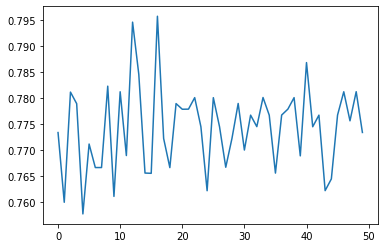

In [17]:
plt.plot(acc_list)
plt.show()

In [18]:
max_idx = np.argmax(acc_list)
max_cv_acc = acc_list[max_idx]
print(max_cv_acc)

0.7957880861213985


In [19]:
rf = RandomForestClassifier(n_estimators=max_idx+1, criterion='entropy', max_depth=5)

rf.fit(X_train, y_train)

rf.score(X_train, y_train)

<ipython-input-19-78b36458d3e2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.8271604938271605

In [20]:
ypred = rf.predict(X_test)
ypred.shape

(418,)

In [21]:
submission_df = pd.DataFrame({'PassengerId':test_data['PassengerId'], 'Survived':ypred})
submission_df.to_csv('Submission.csv', index=False)